# 1_ctx_th_connection_and_gene_exp_cluster

In [2]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from matplotlib import cm
import scanpy as sc
import seaborn as sns
import warnings
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [3]:
# load adata and cell type

adata = sc.read_h5ad('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/adata_processed.h5ad')
allen_region = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/allen_region.csv')
adata.obs['region'] = allen_region['region'].values
# add cell type
meta = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/cell_metadata_with_cluster_annotation.csv')
meta = meta.set_index('cell_label')
meta = meta.loc[adata.obs.index.to_list()]
adata.obs['cell_type'] = meta['class'].to_list()
adata.obs

brain_section_label           x  \
cell_label                                                                
198904341065180396762707397604803217407   Zhuang-ABCA-3.023   49.206853   
252199681526991424029643077826220097990   Zhuang-ABCA-3.023   48.973992   
277720971126854564514249564750701518375   Zhuang-ABCA-3.023   48.791066   
31551867344111790264292067056219852271    Zhuang-ABCA-3.023   48.830489   
131102494428104399865219008178262036485   Zhuang-ABCA-3.023   48.308843   
...                                                     ...         ...   
318102106429791409781741726367984532777   Zhuang-ABCA-3.009  131.090716   
35262847161560382172299767067854387528    Zhuang-ABCA-3.009  131.216032   
75415866509570969932943497000463821106    Zhuang-ABCA-3.009  131.415152   
12350978322417280063239916106423065862    Zhuang-ABCA-3.009  131.646167   
327554758863546024460748891922509519354   Zhuang-ABCA-3.009  131.658892   

                                                 y          z      x_ccf  \
cell_label                                                                 
198904341065180396762707397604803217407  44.877634  12.168155   4.920685   
252199681526991424029643077826220097990  44.813761  12.179006   4.897399   
277720971126854564514249564750701518375  44.577722  12.192707   4.879107   
31551867344111790264292067056219852271   44.426120  12.195078   4.883049   
131102494428104399865219008178262036485  43.028156  12.267879   4.830884   
...                                            ...        ...        ...   
318102106429791409781741726367984532777  69.334275  41.436743  13.109072   
35262847161560382172299767067854387528   69.494070  41.351034  13.121603   
75415866509570969932943497000463821106   70.764504  40.800403  13.141515   
12350978322417280063239916106423065862   71.182557  40.595995  13.164617   
327554758863546024460748891922509519354  71.414675  40.501356  13.165889   

                                            y_ccf     z_ccf region  \
cell_label                                                           
198904341065180396762707397604803217407  4.487763  1.216815   SSs1   
252199681526991424029643077826220097990  4.481376  1.217901   SSs1   
277720971126854564514249564750701518375  4.457772  1.219271   SSs1   
31551867344111790264292067056219852271   4.442612  1.219508   SSs1   
131102494428104399865219008178262036485  4.302816  1.226788   SSs1   
...                                           ...       ...    ...   
318102106429791409781741726367984532777  6.933427  4.143674  MDRNd   
35262847161560382172299767067854387528   6.949407  4.135103  MDRNd   
75415866509570969932943497000463821106   7.076450  4.080040   sctd   
12350978322417280063239916106423065862   7.118256  4.059599   sctd   
327554758863546024460748891922509519354  7.141468  4.050136   sctd   

                                             cell_type  
cell_label                                              
198904341065180396762707397604803217407    33 Vascular  
252199681526991424029643077826220097990    33 Vascular  
277720971126854564514249564750701518375    33 Vascular  
31551867344111790264292067056219852271     33 Vascular  
131102494428104399865219008178262036485      34 Immune  
...                                                ...  
318102106429791409781741726367984532777  30 Astro-Epen  
35262847161560382172299767067854387528     33 Vascular  
75415866509570969932943497000463821106      24 MY Glut  
12350978322417280063239916106423065862      24 MY Glut  
327554758863546024460748891922509519354     24 MY Glut  

[1566842 rows x 9 columns]

In [4]:
# Filtering glutamatergic excitatory neurons

adata = adata[adata.obs['cell_type'].str.contains('Glut')]
# adata = adata[adata.obs['cell_type'].str.contains('GABA')]

adata.obs

brain_section_label           x  \
cell_label                                                                
207252950882079766503645227815929952400   Zhuang-ABCA-3.023   50.597984   
311894855078226645952213910865897976013   Zhuang-ABCA-3.023   50.420950   
125208524519663791324346814779771999476   Zhuang-ABCA-3.023   50.959183   
12594778395225515056477813574460470379    Zhuang-ABCA-3.023   49.836112   
148621603142722639702356861951538418099   Zhuang-ABCA-3.023   51.023440   
...                                                     ...         ...   
235686740179650165428728286428984964004   Zhuang-ABCA-3.009  131.552253   
286400092677302831060643120351923719874   Zhuang-ABCA-3.009  131.640659   
75415866509570969932943497000463821106    Zhuang-ABCA-3.009  131.415152   
12350978322417280063239916106423065862    Zhuang-ABCA-3.009  131.646167   
327554758863546024460748891922509519354   Zhuang-ABCA-3.009  131.658892   

                                                 y          z      x_ccf  \
cell_label                                                                 
207252950882079766503645227815929952400  41.393473  12.239274   5.059798   
311894855078226645952213910865897976013  41.271525  12.251970   5.042095   
125208524519663791324346814779771999476  43.276307  12.158869   5.095918   
12594778395225515056477813574460470379   42.209685  12.238386   4.983611   
148621603142722639702356861951538418099  42.722536  12.174236   5.102344   
...                                            ...        ...        ...   
235686740179650165428728286428984964004  69.048948  41.463859  13.155225   
286400092677302831060643120351923719874  70.151099  41.013819  13.164066   
75415866509570969932943497000463821106   70.764504  40.800403  13.141515   
12350978322417280063239916106423065862   71.182557  40.595995  13.164617   
327554758863546024460748891922509519354  71.414675  40.501356  13.165889   

                                            y_ccf     z_ccf  region  \
cell_label                                                            
207252950882079766503645227815929952400  4.139347  1.223927  SSs2/3   
311894855078226645952213910865897976013  4.127152  1.225197    SSs1   
125208524519663791324346814779771999476  4.327631  1.215887  SSs2/3   
12594778395225515056477813574460470379   4.220968  1.223839    SSs1   
148621603142722639702356861951538418099  4.272254  1.217424  SSs2/3   
...                                           ...       ...     ...   
235686740179650165428728286428984964004  6.904895  4.146386   MDRNd   
286400092677302831060643120351923719874  7.015110  4.101382    rust   
75415866509570969932943497000463821106   7.076450  4.080040    sctd   
12350978322417280063239916106423065862   7.118256  4.059599    sctd   
327554758863546024460748891922509519354  7.141468  4.050136    sctd   

                                             cell_type  
cell_label                                              
207252950882079766503645227815929952400  01 IT-ET Glut  
311894855078226645952213910865897976013  01 IT-ET Glut  
125208524519663791324346814779771999476  01 IT-ET Glut  
12594778395225515056477813574460470379   01 IT-ET Glut  
148621603142722639702356861951538418099  01 IT-ET Glut  
...                                                ...  
235686740179650165428728286428984964004     24 MY Glut  
286400092677302831060643120351923719874     24 MY Glut  
75415866509570969932943497000463821106      24 MY Glut  
12350978322417280063239916106423065862      24 MY Glut  
327554758863546024460748891922509519354     24 MY Glut  

[530094 rows x 9 columns]

In [5]:
th_regions = ['AD', 'AMd', 'AMv', 'AV', 'CL', 'CM', 'IAD', 'IAM', 'IGL', 'IMD', 'LD', 'LGv', 'LH', 'LP', 'MD', 'MGd', 'MGm', 'MGv', 'MH', 'PCN', 'PF', 'PIL', 'PO', 'POL',
                'PP', 'PR', 'PT', 'PVT', 'PoT', 'RE', 'RH', 'RT', 'SGN', 'SMT', 'SPA', 'SPFm', 'SPFp', 'VAL', 'VM', 'VPL', 'VPLpc', 'VPM', 'VPMpc', 'Xi']
ctx_regions = ['ACAd', 'ACAv', 'AId', 'AIp', 'AIv', 'AUDd', 'AUDp', 'AUDpo',
                'AUDv', 'ECT', 'FRP', 'GU', 'ILA', 'MOp', 'MOs', 'ORBl', 'ORBm',
                'ORBvl', 'PERI', 'PL', 'RSPagl', 'RSPd', 'RSPv', 'SSp-bfd',
                'SSp-ll', 'SSp-m', 'SSp-n', 'SSp-tr', 'SSp-ul', 'SSp-un', 'SSs',
                'TEa', 'VISC', 'VISa', 'VISal', 'VISam', 'VISl', 'VISli', 'VISp',
                'VISpl', 'VISpm', 'VISpor', 'VISrl']

# Filtering thalamic nuclei
adata_sc_sel = adata[adata.obs['region'].isin(th_regions)]
sc.pp.normalize_total(adata_sc_sel, target_sum=1e4)
sc.pp.log1p(adata_sc_sel)
adata_sc_sel

AnnData object with n_obs × n_vars = 11632 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type'
    uns: 'log1p'

### ctx to th connection cluster

In [6]:
conn = pd.read_csv('../data/ctx2th_ave_connection_strength.csv', index_col=0)
conn = conn.transpose()
conn

ACAd      ACAv           AId       AIp           AIv          AUDd  \
AD     0.000152  0.000192  7.619523e-06  0.000010  5.887578e-06  8.007340e-06   
AMd    0.000664  0.000746  6.691810e-05  0.000014  4.837233e-05  5.128748e-06   
AMv    0.000771  0.000820  1.228778e-04  0.000021  8.823841e-05  9.028019e-06   
AV     0.000480  0.000474  1.013730e-05  0.000001  5.824439e-06  1.495290e-05   
CL     0.000601  0.000533  9.876311e-05  0.000044  5.617855e-05  4.381585e-05   
CM     0.000154  0.000158  3.049474e-04  0.000152  3.050938e-04  4.447017e-06   
IAD    0.000534  0.000577  6.229742e-05  0.000018  4.651523e-05  3.388965e-06   
IAM    0.000407  0.000462  7.161324e-05  0.000025  5.872044e-05  4.505570e-06   
IGL    0.000056  0.000083  1.004325e-06  0.000002  9.865555e-07  4.479001e-04   
IMD    0.000075  0.000106  5.153220e-04  0.000309  6.609953e-04  2.648984e-06   
LD     0.000489  0.000518  4.249831e-06  0.000002  2.572958e-06  1.374043e-04   
LGv    0.000084  0.000107  4.184993e-07  0.000001  4.032791e-07  3.592279e-04   
LH     0.000102  0.000153  2.734611e-05  0.000013  2.699298e-05  3.924288e-06   
LP     0.000288  0.000296  6.197639e-06  0.000020  3.744213e-06  4.537852e-04   
MD     0.000269  0.000260  4.223403e-04  0.000122  4.409378e-04  3.972758e-06   
MGd    0.000006  0.000006  4.138417e-06  0.000018  5.092190e-06  1.370971e-03   
MGm    0.000098  0.000092  9.269953e-06  0.000106  8.027737e-06  6.044557e-04   
MGv    0.000014  0.000014  3.641458e-06  0.000035  4.308976e-06  1.386466e-03   
MH     0.000006  0.000020  1.140038e-06  0.000002  9.041835e-07  5.921155e-07   
PCN    0.000129  0.000077  4.909851e-04  0.000182  4.074414e-04  1.138335e-05   
PF     0.000332  0.000307  2.923657e-04  0.000222  2.497150e-04  8.224716e-05   
PIL    0.000094  0.000090  4.543945e-05  0.000174  4.551988e-05  6.713279e-04   
PO     0.000159  0.000102  2.125703e-04  0.000237  1.440922e-04  1.015075e-04   
POL    0.000194  0.000174  2.934526e-05  0.000058  1.894002e-05  4.916248e-04   
PP     0.000054  0.000058  6.608591e-06  0.000108  4.657731e-06  9.965551e-04   
PR     0.000345  0.000534  7.168793e-05  0.000089  6.519891e-05  2.437460e-05   
PT     0.000103  0.000234  3.647708e-05  0.000036  3.049506e-05  1.662613e-06   
PVT    0.000061  0.000162  5.087197e-05  0.000112  6.205588e-05  1.895285e-06   
PoT    0.000220  0.000198  9.930714e-05  0.000266  7.676983e-05  3.366202e-04   
RE     0.000245  0.000365  4.118779e-05  0.000057  3.650209e-05  1.109817e-05   
RH     0.000323  0.000355  2.290540e-04  0.000125  2.070770e-04  2.147445e-05   
RT     0.000336  0.000331  1.370683e-04  0.000062  1.068166e-04  1.396533e-04   
SGN    0.000039  0.000036  1.212349e-06  0.000033  1.155121e-06  9.708160e-04   
SMT    0.000335  0.000342  3.431704e-04  0.000112  2.872273e-04  3.548723e-05   
SPA    0.000244  0.000346  1.559442e-04  0.000151  1.908120e-04  9.964673e-06   
SPFm   0.000361  0.000506  5.206138e-05  0.000067  5.164480e-05  5.544868e-05   
SPFp   0.000483  0.000453  1.473219e-04  0.000241  1.269824e-04  2.484715e-04   
VAL    0.000425  0.000314  2.663332e-04  0.000050  1.547514e-04  5.536264e-05   
VM     0.000482  0.000435  3.047505e-04  0.000105  2.542895e-04  2.697555e-05   
VPL    0.000161  0.000133  5.194950e-05  0.000088  3.739928e-05  1.386123e-04   
VPLpc  0.000242  0.000241  4.872967e-04  0.001075  5.321095e-04  6.394511e-05   
VPM    0.000039  0.000025  1.681293e-04  0.000161  1.229011e-04  1.281432e-04   
VPMpc  0.000153  0.000159  6.775987e-04  0.000897  7.926928e-04  4.565133e-05   
Xi     0.000309  0.000434  4.451510e-05  0.000081  4.349116e-05  7.773328e-06   

               AUDp         AUDpo      AUDv       ECT  ...      VISa  \
AD     1.649951e-05  3.103780e-05  0.000015  0.000025  ...  0.000170   
AMd    7.461110e-06  1.335113e-05  0.000007  0.000012  ...  0.000224   
AMv    1.033547e-05  1.672509e-05  0.000010  0.000018  ...  0.000252   
AV     1.333239e-05  2.317443e-05  0.000005  0.000005  ...  0.000264   
CL   

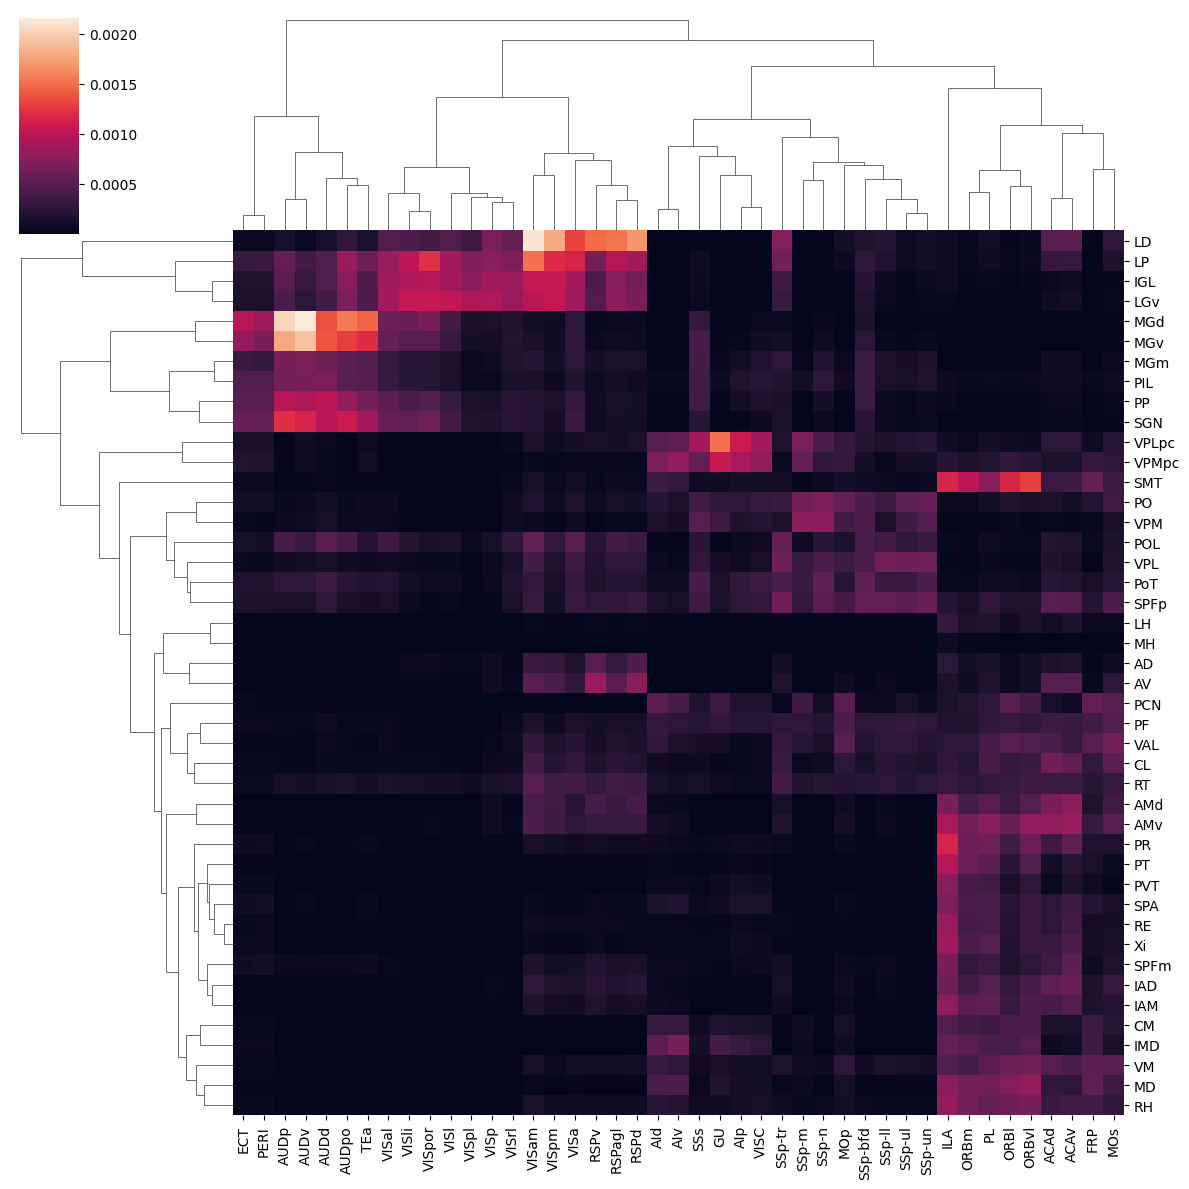

In [7]:
g = sns.clustermap(conn, figsize=(12,12))

In [8]:
from scipy.cluster import hierarchy
col_linkage = g.dendrogram_col.linkage
col_clusters = hierarchy.fcluster(col_linkage, t=0.5, criterion='distance')
reordered_cols = g.dendrogram_col.reordered_ind
col_labels = np.array(conn.columns)[reordered_cols]
col_labels

array(['ECT', 'PERI', 'AUDp', 'AUDv', 'AUDd', 'AUDpo', 'TEa', 'VISal',
       'VISli', 'VISpor', 'VISl', 'VISpl', 'VISp', 'VISrl', 'VISam',
       'VISpm', 'VISa', 'RSPv', 'RSPagl', 'RSPd', 'AId', 'AIv', 'SSs',
       'GU', 'AIp', 'VISC', 'SSp-tr', 'SSp-m', 'SSp-n', 'MOp', 'SSp-bfd',
       'SSp-ll', 'SSp-ul', 'SSp-un', 'ILA', 'ORBm', 'PL', 'ORBl', 'ORBvl',
       'ACAd', 'ACAv', 'FRP', 'MOs'], dtype=object)

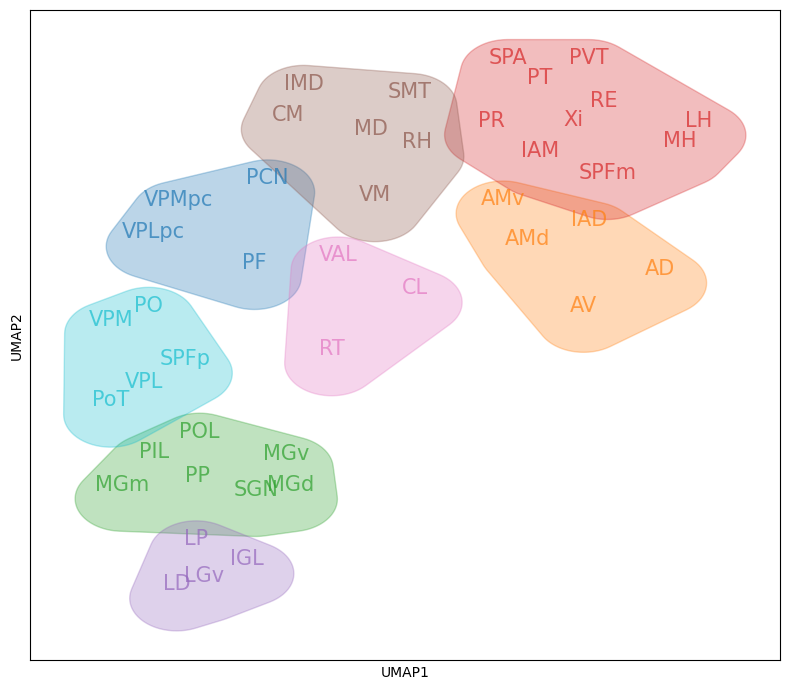

In [9]:
# Use UMAP for 2D dimension reduction
reducer = umap.UMAP(n_components=2, random_state=43)
embedding = reducer.fit_transform(conn)

# Classification of UMAP results
n_clusters=8
kmeans = KMeans(n_clusters=n_clusters, random_state=44)
clusters = kmeans.fit_predict(embedding)

# Convert Embedding to DataFrame for easy operation
embedding_df = pd.DataFrame(embedding, index=conn.index, columns=['UMAP1', 'UMAP2'])
embedding_df['Cluster'] = clusters

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#17becf', '#e377c2']

fig, ax = plt.subplots(figsize=(8, 7))
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
# Draw a 2D UMAP diagram with clustering results
for cluster in range(n_clusters):
    subset = embedding_df[embedding_df['Cluster'] == cluster]
    points = subset[['UMAP1', 'UMAP2']].values
    
    # Get color
    color = color_list[cluster]
    
    # Calculate and draw the expanded and smooth convex bag
    if len(points) > 2:  # Ne convex bags require at least 3 points
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        
        # Create polygon and expand
        poly = Polygon(hull_points).buffer(0.3)
        # Make the polygon smoother
        smooth_poly = poly.buffer(0.2, resolution=16, join_style=1).buffer(-0.2, resolution=16, join_style=1)
        # Get the coordinates of polygonal shape
        x, y = smooth_poly.exterior.xy
        # Draw a smooth polygon
        ax.fill(x, y, alpha=0.3, fc=color, ec=color)

# Add sample name names as labels, and set label color to the same color scattering color
for sample in embedding_df.index:
    cluster = embedding_df.loc[sample, 'Cluster']
    x = embedding_df.loc[sample, 'UMAP1']
    y = embedding_df.loc[sample, 'UMAP2']
    plt.annotate(sample, 
                 (x, y),
                 xytext=(0, 3),  # The text shifts 5 units in the Y direction
                 textcoords='offset points',  # Specify unit with offset
                 fontsize=15, 
                #  color='black',
                 color=color_list[cluster],
                 ha='center',  # Horizontal alignment
                 va='bottom',  # Align in the bottom of the vertical direction (close to the offset point)
                 alpha=0.7
                 )
plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.tight_layout()
# plt.savefig('./conn_umap.pdf', format='pdf')

In [10]:
embedding_df['Cluster'] = embedding_df['Cluster'].astype(str)
th_cluster_order = []
num = []
for i in range(8):
    tmp = embedding_df[embedding_df['Cluster'] == str(i)]
    th_cluster_order = th_cluster_order + tmp.index.tolist()
    num.append(len(tmp))
    print(tmp.index.tolist())
th_cluster_order

ctx_cluster_order = ['ECT', 'PERI', 'AUDp', 'AUDv', 'AUDd', 'AUDpo', 'TEa', 'VISal',
       'VISli', 'VISpor', 'VISl', 'VISpl', 'VISp', 'VISrl', 'VISam',
       'VISpm', 'VISa', 'RSPv', 'RSPagl', 'RSPd', 'AId', 'AIv', 'SSs',
       'GU', 'AIp', 'VISC', 'SSp-tr', 'SSp-m', 'SSp-n', 'MOp', 'SSp-bfd',
       'SSp-ll', 'SSp-ul', 'SSp-un', 'ILA', 'ORBm', 'PL', 'ORBl', 'ORBvl',
       'ACAd', 'ACAv', 'FRP', 'MOs']

['PCN', 'PF', 'VPLpc', 'VPMpc']
['AD', 'AMd', 'AMv', 'AV', 'IAD']
['MGd', 'MGm', 'MGv', 'PIL', 'POL', 'PP', 'SGN']
['IAM', 'LH', 'MH', 'PR', 'PT', 'PVT', 'RE', 'SPA', 'SPFm', 'Xi']
['IGL', 'LD', 'LGv', 'LP']
['CM', 'IMD', 'MD', 'RH', 'SMT', 'VM']
['PO', 'PoT', 'SPFp', 'VPL', 'VPM']
['CL', 'RT', 'VAL']


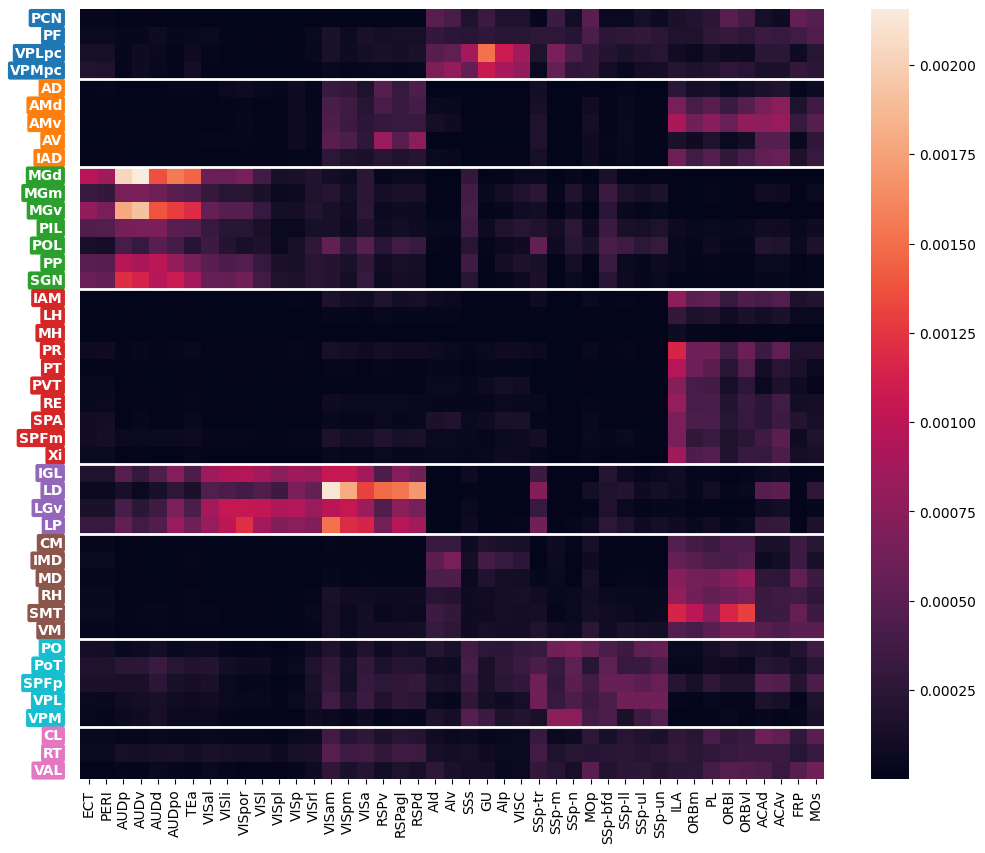

In [11]:
# Define color mapping
cluster_labels = ['TH0']*num[0] + ['TH1']*num[1] + ['TH2']*num[2] + ['TH3']*num[3] + ['TH4']*num[4] + ['TH5']*num[5] + ['TH6']*num[6] + ['TH7']*num[7]

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#17becf', '#e377c2']
cluster_colors = {'TH0': color_list[0], 'TH1': color_list[1], 'TH2': color_list[2], 
                  'TH3': color_list[3], 'TH4': color_list[4], 'TH5': color_list[5], 'TH6': color_list[6], 'TH7': color_list[7]}
# Create Label Color
row_colors = pd.Series(cluster_labels).map(cluster_colors)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(conn.loc[th_cluster_order, ctx_cluster_order], ax=ax, yticklabels=False)
# Add cluster segmentation line
prev_cluster = cluster_labels[0]
for idx, label in enumerate(cluster_labels):
    if label != prev_cluster:
        ax.axhline(idx, color='white', linewidth=2)
        prev_cluster = label

# Add row label color
idx = 0
for id, label in zip(th_cluster_order, cluster_labels):
    ax.text(-1.0, idx + 0.5, id, color='white', va='center', ha='right',fontweight='bold',
            bbox=dict(facecolor=cluster_colors[label], edgecolor='none', boxstyle='round,pad=0.15'))
    idx += 1

# plt.savefig('./Supp_fig/ctx2th_conn_ordered_by_umap.pdf', format='pdf')

### gene exp umap

In [12]:
value_to_label = dict(zip(embedding_df.index, embedding_df['Cluster']))
adata_sc_sel.obs['all_Glut_Neurons'] = adata_sc_sel.obs['region'].map(value_to_label).astype('str')
adata_sc_sel.obs['all_Glut_Neurons'] = 'TH_' + (adata_sc_sel.obs['all_Glut_Neurons'].astype(int)+1).astype(str)

In [13]:
sc.tl.pca(adata_sc_sel)
sc.pp.neighbors(adata_sc_sel)
sc.tl.umap(adata_sc_sel, n_components=2)

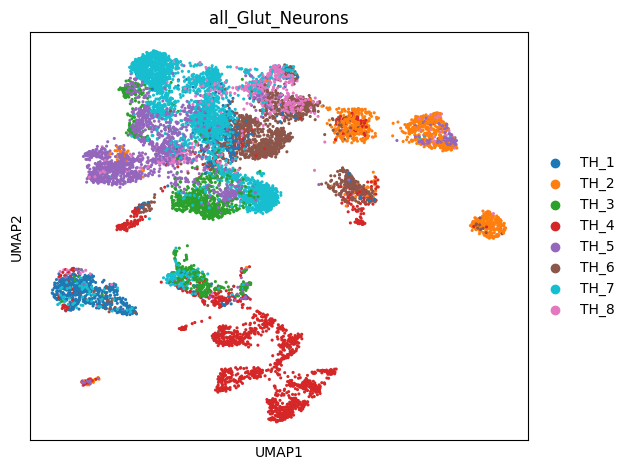

In [14]:
# sc.pl.umap(adata_sc_sel, color='all_Glut_Neurons', show=False,add_outline=True,legend_fontsize=12,legend_fontoutline=2, size=20)
# Create color list
# color_list = plt.cm.tab10(np.linspace(0, 1, n_clusters))
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#17becf', '#e377c2']
# Create a color dictionary
unique_neurons = adata_sc_sel.obs['all_Glut_Neurons'].unique()
color_dict = dict(zip(sorted(unique_neurons), color_list))
# Draw UMAP diagram
sc.pl.umap(adata_sc_sel, color='all_Glut_Neurons', size=20, palette=color_dict, show=False)
# sc.pl.umap(adata_sc_sel, color='all_Glut_Neurons', size=20)
plt.tight_layout()
# plt.savefig('th_gene_exp_umap.pdf', format='pdf')

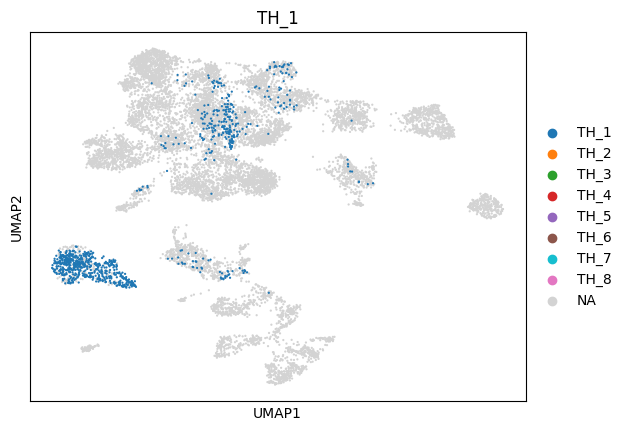

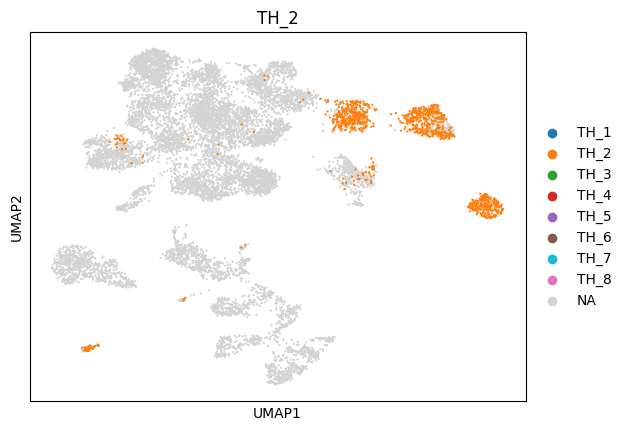

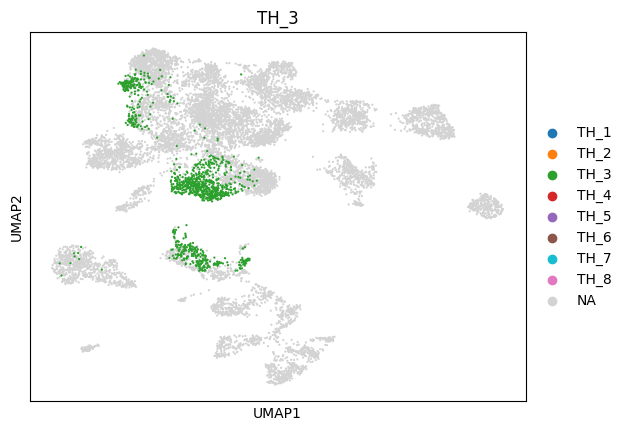

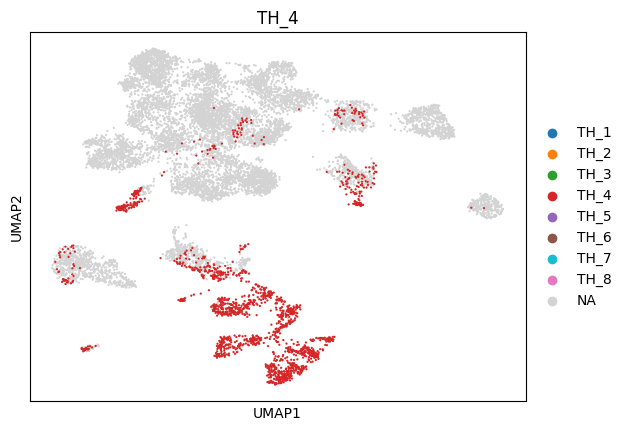

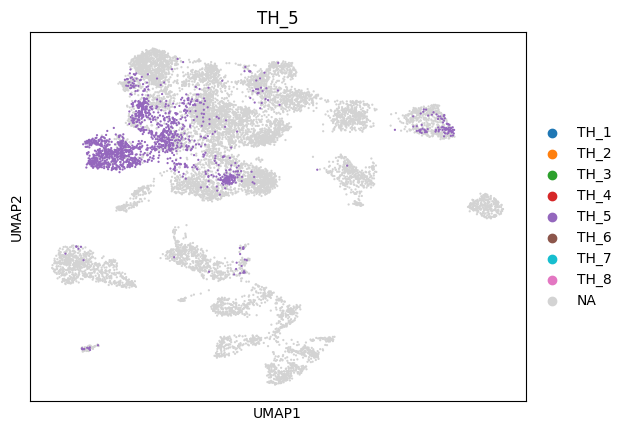

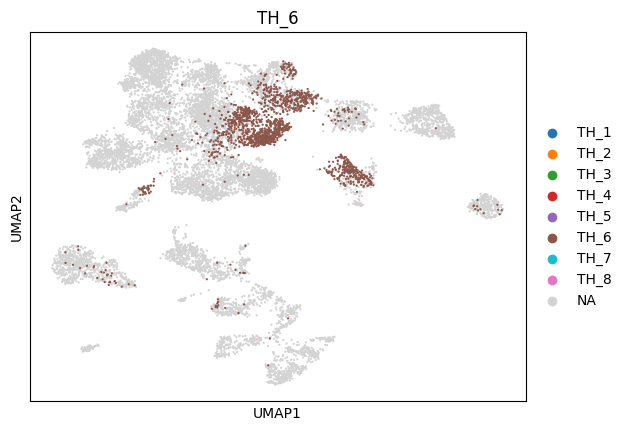

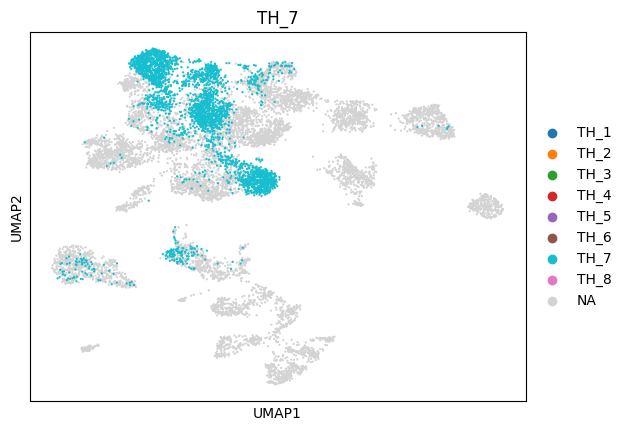

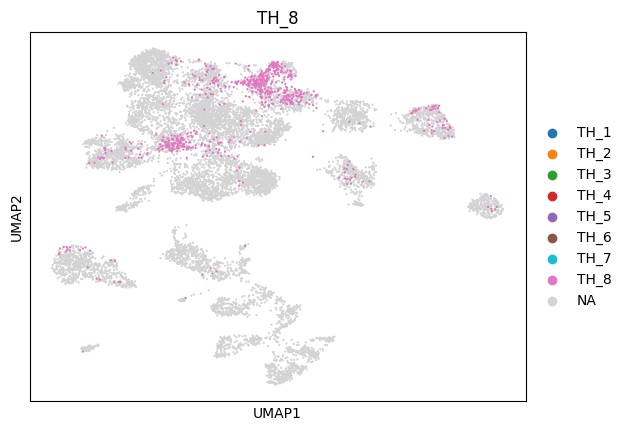

In [15]:
for i in range(8):
    sub = f'TH_{i+1}'
    adata_sc_sel.obs[sub] = adata_sc_sel.obs['all_Glut_Neurons']
    adata_sc_sel.obs.loc[adata_sc_sel.obs['all_Glut_Neurons'] != sub, sub] = None
    sc.pl.umap(adata_sc_sel, color=sub, palette=color_dict, show=False)
    # plt.savefig(f'./Supp_fig/th_gene_exp_umap_cluster{i+1}.pdf', format='pdf')
    # plt.savefig(f'./Supp_fig/th_gene_exp_umap_cluster{i+1}.png', dpi=400)